#  Shallow networks with Keras on CIFAR10
Modify the example given in the class on the MNIST dataset to train and evaluate a shallow
networks on the CIFAR10 dataset. The CIFAR10 dataset is composed of 60’000 images equally
spread into 10 classes, i.e. with 6’000 images per class. The Figure 3 illustrates some images
for each classes. Each images are 32 × 32 pixels with RGB channels. A single image can then
be stored in a numpy array of shape 32 × 32 × 3 . Use the loader provided in TensorFlow that
will split the set into 50’000 images for training and 10’000 images for testing.


## check for tensorflow version

In [1]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


## loading the data

In [2]:
from tensorflow.keras.datasets import cifar10

# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print("Number of training samples: ", X_train.shape[0])
print("Number of test samples: ", X_test.shape[0])

Number of training samples:  50000
Number of test samples:  10000


In [6]:
labels[y_train[0][0]]

'frog'

## labels


In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [5]:
labels = ["airplane",
         "automobile",
         "bird",
         "cat",
         "deer",
         "dog",
         "frog",
         "horse",
         "ship",
         "truck"]

print("The 10 classes are: ", labels)

The 10 classes are:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## inspect the data 

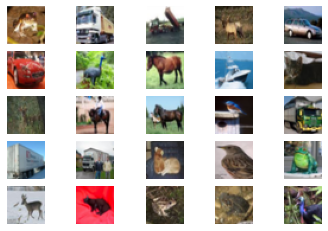

In [7]:
import matplotlib.pyplot as plt

def show_imgs(X):
  plt.figure(1)
  k = 0
  
  for i in range(0,5):
    for j in range(0,5):
      plt.subplot2grid((5,5),(i,j))
      plt.imshow(X[k], cmap='gray')
      k = k+1
      plt.axis('off')
  
  plt.show()

show_imgs(X_train)

## preprocess the data

In [8]:
print("Number of samples: ", X_train.shape[0])
print("Training set dimension: ", X_train.shape)
print("Test set dimension: ", X_test.shape)

Number of samples:  50000
Training set dimension:  (50000, 32, 32, 3)
Test set dimension:  (10000, 32, 32, 3)


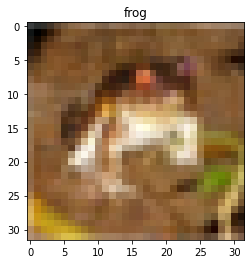

In [9]:
import numpy as np

idx = 0
plt.imshow(X_train[idx,:,:,:])
plt.title(labels[y_train[idx][0]])
plt.show()

In [10]:
# normalize the input
#
# TODO:
# Pay attention that here, the normalization of the weight values
# to 0-256 values should be done on a per-channel basis (RGB). 
X_train =  X_train.reshape(50000, 32*32*3)  #change the shape towards (50000, 32*32*3)
X_test =  X_test.reshape(10000, 32*32*3)    #idem (10000, 32*32*3)
X_train =  X_train.astype('float32')        #change the type towards float32
X_test = X_test.astype('float32')           #idem
X_train /= 255.0                            #normalize the range to be between 0.0 and 1.0
X_test /= 255.0                             #idem
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [11]:
from tensorflow.keras import utils

n_classes = len(labels)
# Conversion to class vectors
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## One-layer network and weight visualisation
Train a simple 1-layer dense network using the following parameters : 5 epochs, batch size =
128, L2 regularizer (value of 0.05), softmax activation, categorical-crossentropy loss and
adam optimizer. Report on the performance on the test set.


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers

epochs = 5
batches = 128
D = X_train.shape[1]  # dimension of input sample - 32*32*3 CIFAR10

model = Sequential(name='one_layer_network')

model.add(tf.keras.Input(shape=(D,)))
model.add(Dense(n_classes,
                input_shape = (D,),
                kernel_regularizer=regularizers.l2(0.05),
                activation = 'softmax',
                name = "Single"
               ))

model.summary()

Model: "one_layer_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Single (Dense)               (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________


### Compile and train the network

In [13]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])

log = model.fit(X_train,
                Y_train,
                batch_size=batches,
                epochs=epochs,
                validation_data=(X_test, Y_test))

Epoch 1/5
391/391 [==============================] - 2s 4ms/step - loss: 2.6217 - accuracy: 0.2709 - val_loss: 1.9693 - val_accuracy: 0.3508
Epoch 2/5
391/391 [==============================] - 1s 4ms/step - loss: 1.9998 - accuracy: 0.3295 - val_loss: 1.9743 - val_accuracy: 0.3372
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 1.9806 - accuracy: 0.3361 - val_loss: 1.9674 - val_accuracy: 0.3414
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 1.9879 - accuracy: 0.3322 - val_loss: 1.9788 - val_accuracy: 0.3354
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 1.9802 - accuracy: 0.3355 - val_loss: 2.0117 - val_accuracy: 0.3173


## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

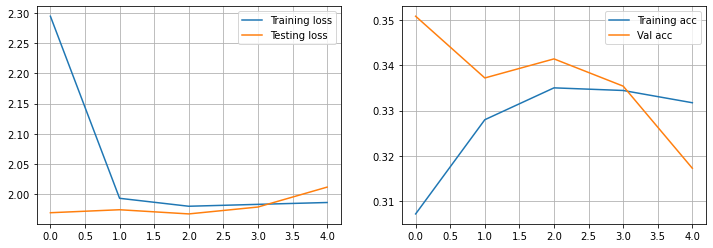

In [14]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Val acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [15]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 2.01174259185791
Test accuracy: 0.3172999918460846


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test, verbose=0)
print(y_pred[0])
y_pred = np.argmax(y_pred, axis=-1)
print(y_pred[0])
cm = confusion_matrix(y_test, y_pred)
print(cm)

[0.10060427 0.10208548 0.14814284 0.15114033 0.06103351 0.24479747
 0.04367637 0.03682038 0.10046229 0.01123709]
5
[[620  50   6   3   8  82   2  91  94  44]
 [165 382   8   6  21 143   4  66  82 123]
 [215  40  98   8 109 301   9 180  26  14]
 [115  53  33  22  42 493   4 175  21  42]
 [104  24  78   5 251 314   3 191  17  13]
 [ 75  32  34  21  40 586   2 171  27  12]
 [ 54  48  53   7 143 443  33 172  16  31]
 [ 97  47  17   7  62 193   1 505  23  48]
 [378  81   1   1   3 103   0  38 317  78]
 [182 155   5   2  11  71   5 119  91 359]]


In [17]:
y_pred = model.predict_classes(X_test, verbose=0)
confusion_matrix(y_test, y_pred)

C:\Users\Yohanes Sugiarto\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[620,  50,   6,   3,   8,  82,   2,  91,  94,  44],
       [165, 382,   8,   6,  21, 143,   4,  66,  82, 123],
       [215,  40,  98,   8, 109, 301,   9, 180,  26,  14],
       [115,  53,  33,  22,  42, 493,   4, 175,  21,  42],
       [104,  24,  78,   5, 251, 314,   3, 191,  17,  13],
       [ 75,  32,  34,  21,  40, 586,   2, 171,  27,  12],
       [ 54,  48,  53,   7, 143, 443,  33, 172,  16,  31],
       [ 97,  47,  17,   7,  62, 193,   1, 505,  23,  48],
       [378,  81,   1,   1,   3, 103,   0,  38, 317,  78],
       [182, 155,   5,   2,  11,  71,   5, 119,  91, 359]], dtype=int64)

### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to rehape them into R-G-B channels and re-scale the weight values into 0-255 pixel values.

(3072, 10)
(10,)


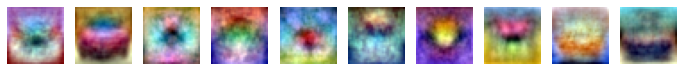

In [18]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]
    im = im.reshape(32,32,3)
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    for channel in range(3):
        min = np.min(im[:,:,channel])
        max = np.max(im[:,:,channel])
        im[:,:,channel] = np.round((im[:,:,channel] - min)/(max - min) * 255)
        
    im = im.astype(int)
    ax.axis('off')
    ax.imshow(im)

## Two-layers network
### Define the network

In [19]:
epochs = 30
batches = 128
D = X_train.shape[1]  # dimension of input sample - 32*32*3 CIFAR10

model2 = Sequential(name='two_layers_network')

# two layers network
H = 128
model2.add(Dense(H, input_shape=(D,), activation='relu', name="hidden"))
model2.add(Dense(n_classes, input_shape=(D,), activation='softmax', name="output"))

model2.summary()

Model: "two_layers_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 128)               393344    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


### Compile and train the network

In [20]:
model2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])

log2 = model2.fit(X_train,
                Y_train,
                batch_size=batches,
                epochs=epochs,
                validation_data=(X_test, Y_test))

Epoch 1/30
391/391 [==============================] - 2s 5ms/step - loss: 2.0515 - accuracy: 0.2702 - val_loss: 1.8001 - val_accuracy: 0.3602
Epoch 2/30
391/391 [==============================] - 2s 5ms/step - loss: 1.8001 - accuracy: 0.3644 - val_loss: 1.7718 - val_accuracy: 0.3753
Epoch 3/30
391/391 [==============================] - 2s 5ms/step - loss: 1.7295 - accuracy: 0.3907 - val_loss: 1.7142 - val_accuracy: 0.3896
Epoch 4/30
391/391 [==============================] - 2s 5ms/step - loss: 1.6844 - accuracy: 0.4075 - val_loss: 1.6391 - val_accuracy: 0.4226
Epoch 5/30
391/391 [==============================] - 2s 5ms/step - loss: 1.6358 - accuracy: 0.4233 - val_loss: 1.6321 - val_accuracy: 0.4248
Epoch 6/30
391/391 [==============================] - 2s 5ms/step - loss: 1.6146 - accuracy: 0.4289 - val_loss: 1.5956 - val_accuracy: 0.4285
Epoch 7/30
391/391 [==============================] - 2s 5ms/step - loss: 1.5842 - accuracy: 0.4435 - val_loss: 1.5799 - val_accuracy: 0.4431
Epoch 

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

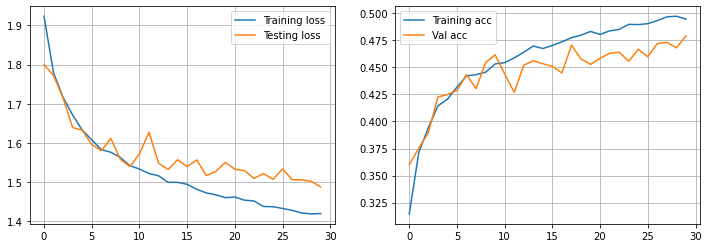

In [21]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log2.history['loss'], label='Training loss')
ax1.plot(log2.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log2.history['accuracy'], label='Training acc')
ax2.plot(log2.history['val_accuracy'], label='Val acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [22]:
loss_test, metric_test = model2.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 1.4873493909835815
Test accuracy: 0.4790000021457672


### Confusion matrix
We can call the `predict_classes()` function to get the predicted classes. The output of this function is an array with the predicted class labels as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [23]:
y_pred = model2.predict(X_test, verbose=0)
print(y_pred[0])
y_pred = np.argmax(y_pred, axis=-1)
print(y_pred[0])
cm = confusion_matrix(y_test, y_pred)
print(cm)

[0.02595873 0.01186602 0.09662048 0.35950038 0.04914707 0.28034568
 0.07224139 0.00201457 0.10167967 0.00062603]
3
[[464  30 116  13  27  15  14  30 200  91]
 [ 28 590  18   8  19  13  16  18  81 209]
 [ 61  27 416  48 155  67  97  66  29  34]
 [ 24  31 141 240  83 170 137  54  56  64]
 [ 37  16 168  34 442  45 116  71  42  29]
 [ 14  17 129 149  98 356  80  69  47  41]
 [  8  22 113  64 135  55 526  27  23  27]
 [ 38  31  86  36 123  67  22 468  38  91]
 [ 66  66  31  10  23  19   7  10 676  92]
 [ 19 162  15  22  19  20  15  37  79 612]]


### Model improvement

Model: "manually_improved_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 128)               393344    
_________________________________________________________________
hidden1 (Dense)              (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
391/391 [==============================] - 3s 6ms/step - loss: 1.9973 - accuracy: 0.2746 - val_loss: 1.8162 - val_accuracy: 0.3446
Epoch 2/50
391/391 [==============================] - 2s 5ms/step - loss: 1.7301 - accuracy: 0.3809 - val_loss: 1.6566 - val_accuracy: 0.4074
Epoch 3/50
391/391 [==============================] - 2s 5ms/step - loss: 1.6217 

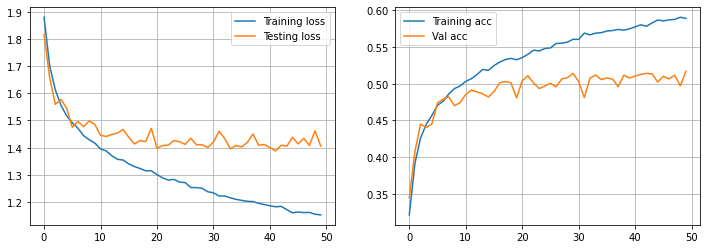

In [31]:
epochs = 50
batches = 128
D = X_train.shape[1]  # dimension of input sample - 32*32*3 CIFAR10

model3 = Sequential(name='manually_improved_network')

# two layers network
H = 128
model3.add(Dense(H, input_shape=(D,), activation='relu', name="hidden"))
model3.add(Dense(H, activation='relu', name="hidden1"))
model3.add(Dense(n_classes, input_shape=(D,), activation='softmax', name="output"))

model3.summary()

model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])

log3 = model3.fit(X_train,
                Y_train,
                batch_size=batches,
                epochs=epochs,
                validation_data=(X_test, Y_test))

f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log3.history['loss'], label='Training loss')
ax1.plot(log3.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log3.history['accuracy'], label='Training acc')
ax2.plot(log3.history['val_accuracy'], label='Val acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model3.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Model: "manually_improved_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 128)               393344    
_________________________________________________________________
hidden1 (Dense)              (None, 128)               16512     
_________________________________________________________________
hidden2 (Dense)              (None, 128)               16512     
_________________________________________________________________
hidden3 (Dense)              (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 444,170
Trainable params: 444,170
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
391/391 [==============================] - 3s 6ms/step - loss: 2.0125 - accuracy: 0.2563 -

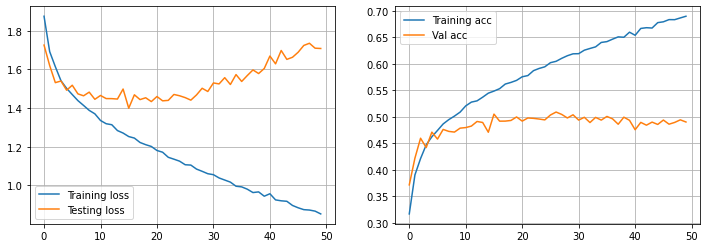

In [38]:
epochs = 50
batches = 128
D = X_train.shape[1]  # dimension of input sample - 32*32*3 CIFAR10

model4 = Sequential(name='manually_improved_network')

# two layers network
H = 128
model4.add(Dense(H, input_shape=(D,), activation='relu', name="hidden"))
model4.add(Dense(H, activation='relu', name="hidden1"))
model4.add(Dense(H, activation='relu', name="hidden2"))
model4.add(Dense(H, activation='relu', name="hidden3"))
model4.add(Dense(n_classes, input_shape=(D,), activation='softmax', name="output"))

model4.summary()

model4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
             optimizer='adam',
             metrics=['accuracy'])

log4 = model4.fit(X_train,
                Y_train,
                batch_size=batches,
                epochs=epochs,
                validation_data=(X_test, Y_test))

f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log4.history['loss'], label='Training loss')
ax1.plot(log4.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log4.history['accuracy'], label='Training acc')
ax2.plot(log4.history['val_accuracy'], label='Val acc')
ax2.legend()
ax2.grid()

loss_test, metric_test = model4.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)